In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def get_object_location(query, train, min_count=10):
    MIN_MATCH_COUNT = min_count
    img1 = cv2.imread(query,0)          # queryImage
    img2 = cv2.imread(train,0) # trainImage
    # Deklarasi SIFT
    sift = cv2.xfeatures2d.SURF_create()
    
    # a) Find keypoints in the images and plot the keypoint matches. Show true and false matches with different colors
    # Mencari Keypoints dan Descriptor dengan SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1,des2,k=2)
    # Tampung semua hasil yang sesuai dengan Lowe's Ratio Test
    good = []
    
    # b) Using Direct Linear Transformation algorithm, find the homography matrix for the test images
    # Membuat Homography Matrix
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()
        h,w = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)
        img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    else:
        print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
        matchesMask = None
    
    # c) Find corners of the bounding box for the test images in the collage image and draw their bounding box. 
         # Show your matching result for both test images.
    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
    img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
    plt.figure(figsize = (10,10))
    plt.imshow(img3)
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()

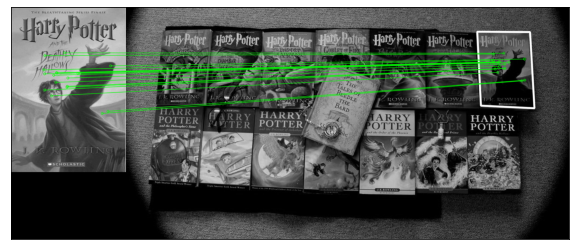

In [16]:
# Panggil Function untuk Mencari Gambar test1 dengan collage
query = 'Dataset_P3/test1.jpeg'
train = 'Dataset_P3/collage.jpg'
get_object_location(query, train)

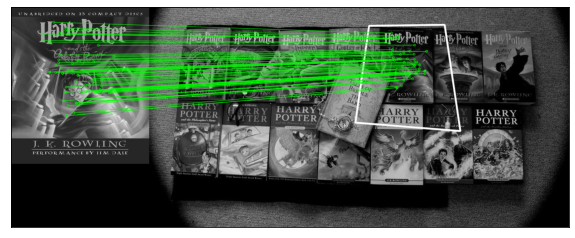

In [17]:
# Panggil Function untuk Mencari Gambar test2 dengan Collage
query2 = 'Dataset_P3/test2.jpeg'
train = 'Dataset_P3/collage.jpg'
get_object_location(query2, train)